<a href="https://colab.research.google.com/github/caroheymes/Basic-analysis-of-frequency-with-TF-IDF/blob/main/01_Learn_about_Obi_Wan_Kenobi_caro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learn about Obi-Wan Kenobi

Are you a star wars fan? If not, this exercise will help you learn about one of the most important character of the saga: Obi-Wan Kenobi. We will scrap a wikipedia page and create a word cloud to understand what comes out of the article. 

* To focus on NLP, let's use the following code to retrieve a clean HTML page from a variable. We will see later in the program how it works: 
```

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import requests
from bs4 import BeautifulSoup
r = requests.get( "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi" )
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')
 
corpus = [ ]
for p in soup.find_all("p"):
  corpus.append(p.text)

In [ ]:
corpus[:5]

['\n\t\tPages pour les éditeurs déconnectés en savoir plus\n',
 "Si vous disposez d'ouvrages ou d'articles de référence ou si vous connaissez des sites web de qualité traitant du thème abordé ici, merci de compléter l'article en donnant les références utiles à sa vérifiabilité et en les liant à la section «\xa0Notes et références\xa0» \n",
 'En pratique\xa0: Quelles sources sont attendues\xa0? Comment ajouter mes sources\xa0?\n',
 '\n',
 "Obi-Wan Kenobi, également dit Ben Kenobi, est un personnage de fiction dans l'univers de la série cinématographique Star Wars, créée par George Lucas. Il est un chevalier et maître Jedi, personnage emblématique de la saga. Il fut, jusqu'à la sortie de Rogue One en 2016, l'un des seuls personnages à faire son apparition dans chaque film, que ce soit en présence réelle, en forme de «\xa0fantôme\xa0», ou même simplement en caméo où l'on n'entend que sa voix.\n"]

* We need to install `spacy` modules corresponding to the language specifics (in this case French). So install `en_core_news_sm`. 
  * Feel free to help you with documentation: [English](https://spacy.io/models/fr)

In [ ]:
!pip install spacy -q

In [ ]:
# Import spacy, if you don't have it --> !pip install spacy 
import spacy
spacy.__version__

'2.2.4'

In [ ]:
!python -m spacy download fr_core_news_sm -q

* Since text is in french, import now `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [ ]:
import fr_core_news_sm


In [ ]:
nlp = fr_core_news_sm.load()

* For the rest, we need to create a complete corpus of text in a variable. This is a best-practice in the use of spacy. So you will need to create a clean corpus of text. You can do this with the help of : 
  * join()
  * encode() / decode()
  * strip() 

* Now load your clean corpus in a `doc` object.

In [ ]:
!pip install unidecode

     |████████████████████████████████| 235 kB 8.1 MB/s 


In [ ]:
import unidecode
import string




In [ ]:

var = []
for c in corpus[3:]:
  c = c.replace("'", " ").replace("-"," ").replace("."," ")
  c = unidecode.unidecode(c).translate(str.maketrans('', '', string.punctuation)).strip()
  var.append(c)
doc = ''.join(var)
doc

'Obi Wan Kenobi egalement dit Ben Kenobi est un personnage de fiction dans l univers de la serie cinematographique Star Wars creee par George Lucas  Il est un chevalier et maitre Jedi personnage emblematique de la saga  Il fut jusqu a la sortie de Rogue One en 2016 l un des seuls personnages a faire son apparition dans chaque film que ce soit en presence reelle en forme de  fantome  ou meme simplement en cameo ou l on n entend que sa voixIl est tout d abord le padawan de Qui Gon Jinn avant de devenir lui meme l instructeur d Anakin Skywalker puis de le laisser pour mort a l issue d un terrible combat apres que ce dernier a choisi le cote obscur de la Force et devient Dark Vador seigneur noir Sith bras arme de l empereur galactique Palpatine ou Dark Sidious Darth Sidious en anglais  Ces evenements sont relates dans la prelogie episodes I II et IIIDans la trilogie originale episodes IV V et VI qui relate des evenements posterieurs le vieil Obi Wan Kenobi met Luke Skywalker sur le chemin 

In [ ]:
# texte = []
# for c in corpus[3:]:
#   c = unidecode.unidecode(c).translate(str.maketrans('', '', string.punctuation)).encode('utf-8').decode('utf-8').strip()
#   texte.append(c)
# doc = ''.join(texte)
# doc

''

* With the `wordcloud` library, create a first word cloud 

In [ ]:
font_path ='/content/drive/MyDrive/09_08_nlp/Comfortaa-Bold.ttf'

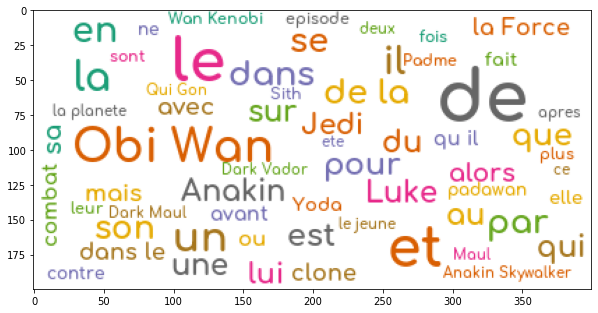

In [ ]:
# Install wordcloud if necessary 
!pip install wordcloud -q
# Import matplotlib and wordcloud 
import matplotlib.pyplot as plt
import wordcloud

# Instanciate WordCloud 
wd = wordcloud.WordCloud(min_font_size=10,
                         max_font_size=50, 
                         max_words=100, 
                         background_color="white", 
                         colormap='Dark2', 
                         font_path=font_path)



cloud = wd.generate(doc)

# Show word cloud with matplotlib 
plt.figure(figsize = (10,10))
plt.imshow(cloud)

# Remove trailing logs 
plt.show()

* Now import the stop-words present in `spacy`

In [ ]:
# Import french stop words
from spacy.lang.fr.stop_words import STOP_WORDS

# Print stop words
print(STOP_WORDS)

{'notre', 'première', 'couic', 'suit', "qu'", 'dehors', 'siens', 'façon', 'te', 'certain', 'suivants', 'pu', 't’', 'nos', 'longtemps', "quelqu'un", 'particulièrement', 'dernier', 'as', 'je', 'avait', 'peu', 'sauf', 'desormais', 'dits', 'revoici', 'mon', 'hi', 'sinon', 'ainsi', 'cette', 'toi', 'onzième', 'pas', 'non', 'pouvait', 'ouf', 'semblaient', 'cinquantième', 'il', 'en', 'hé', 'eux-mêmes', 'apres', 'etre', 's’', "m'", 'maximale', 'particulière', 'na', 'des', 'lui-meme', 'hop', 'assez', 'dit', 'abord', 'pense', 'uns', 'vos', 'directement', 'comment', 'bat', 'voici', 'rarement', 'etaient', 'moindres', 'vu', 'cet', 'surtout', 'sa', 'faisaient', 'restrictif', 'differents', 'partant', 'tu', 'maint', 'egales', 'semblent', 'celle', 'ès', 'font', 'moyennant', 'ait', 'même', 'seulement', 'autrefois', 'puis', 'hui', 'contre', 'tac', 'beau', 'tous', 'bigre', 'quanta', 'miennes', 'celle-là', 'pff', 'quiconque', 'tiens', 'celles-ci', 'hem', 'â', 'via', 'outre', 'alors', 'ceci', 'vôtres', 'pif'

* Make a word cloud again without the stop words

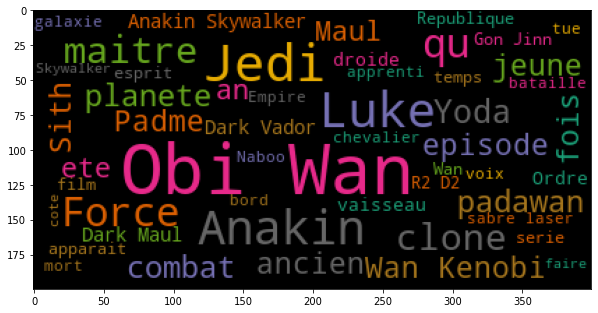

In [ ]:

wd = wordcloud.WordCloud(min_font_size=10,
                         max_font_size=50, 
                         max_words=100, 
                         background_color="black", 
                         colormap='Dark2',
                         stopwords=STOP_WORDS)
# Generate word cloud 
cloud = wd.generate(doc)

# Show with matplotlib 
plt.figure(figsize = (10,10))
plt.imshow(cloud)

# Remove trailing log 
plt.show()

Another wordcloud whith the death star shape !

In [ ]:
import numpy as np
from PIL import Image
mask2 = np.array(Image.open("/content/drive/MyDrive/09_08_nlp/death-star.png"))

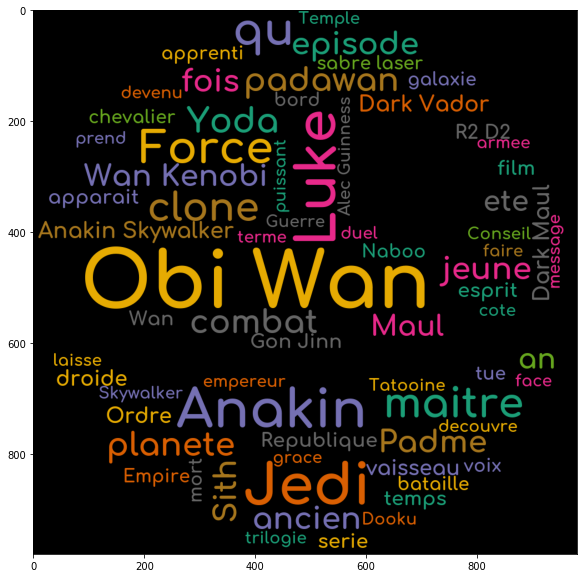

In [ ]:
wd = wordcloud.WordCloud(min_font_size=20,
                        # max_font_size=50, 
                         max_words=100, 
                         background_color="black",
                         colormap='Dark2',
                         mask = mask2,
                         font_path =font_path, 
                         stopwords=STOP_WORDS)
# Generate word cloud 
cloud = wd.generate(doc)


plt.figure(figsize = (10,10))
# Show plot
plt.imshow(cloud)
plt.show()


* We would need to have a corpus of lemmatized words, recreate a corpus of lemmatized words and visualize your new word cloud

In [ ]:
import pandas as pd
import re
var = []
for c in corpus[3:]:
  c = c.replace("'", " ").replace("-"," ").replace("."," ").lower()
  c = unidecode.unidecode(c).translate(str.maketrans('', '', string.punctuation))
  c = re.sub("\d+", "", c) #chiffres
  c = re.sub("\s[a-z]{1}\ ", " ", c).strip() #lettres seules
  var.append(c)
var

df = pd.DataFrame(var, columns=['clean_documents']).dropna(axis=0)
df.sample(3)

,clean_documents
13,apres enlevement du fils de jabba le hutt rott...
34,rey se retrouve attiree par des voix la guidan...
25,en av by obi wanben devenu vieux fait la ren...


In [ ]:
tokenized_doc = df['clean_documents'].fillna('').apply(lambda x: nlp(x))

In [ ]:
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])
tokenized_doc[:3]

0                                                   []
1    [obi, wan, kenobi, ben, kenobi, personnage, fi...
2    [padawan, gon, jinn, devenir, instructeur, ana...
Name: clean_documents, dtype: object

In [ ]:
df["clean_token"] = [" ".join(x) for x in tokenized_doc]
df.head()

,clean_documents,clean_token
0,,
1,obi wan kenobi egalement dit ben kenobi est un...,obi wan kenobi ben kenobi personnage fiction u...
2,il est tout abord le padawan de qui gon jinn a...,padawan gon jinn devenir instructeur anakin sk...
3,dans la trilogie originale episodes iv et vi q...,trilogie original episodes iv vi relate evenem...
4,obi wan kenobi age est interprete par alec gui...,obi wan kenobi age interprete alec guinness tr...


In [ ]:
new = ''.join(df.clean_token.values)

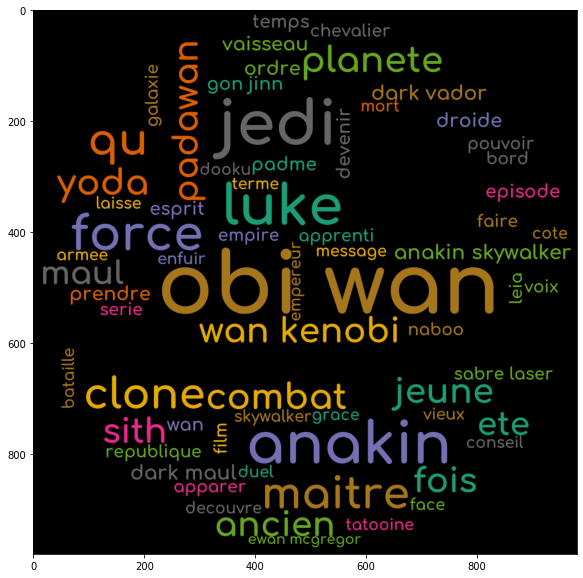

In [ ]:
wd = wordcloud.WordCloud(min_font_size=20,
                         max_words=100, 
                         background_color="black",
                         colormap='Dark2',
                         mask = mask2,
                         font_path =font_path, 
                         stopwords=STOP_WORDS)
# Generate word cloud 
cloud = wd.generate(new)


plt.figure(figsize = (10,10))
# Show plot
plt.imshow(cloud)
plt.show()




---



* Let's push analysis further! Some words are really common in our corpus, find which of them

In [ ]:
from collections import Counter

#Reminder : 
# new = ''.join(df.clean_token.values)

Counter(new.split(' ')).most_common()

[('', 391),
 ('wan', 95),
 ('obi', 81),
 ('anakin', 40),
 ('jedi', 35),
 ('luke', 29),
 ('force', 21),
 ('dark', 21),
 ('maul', 18),
 ('maitre', 17),
 ('qu', 17),
 ('clone', 16),
 ('kenobi', 14),
 ('skywalker', 14),
 ('combat', 14),
 ('jeune', 14),
 ('l', 13),
 ('vador', 12),
 ('planete', 11),
 ('yoda', 11),
 ('sith', 10),
 ('fois', 10),
 ('padawan', 10),
 ('sabre', 10),
 ('ancien', 10),
 ('gon', 9),
 ('cote', 9),
 ('dooku', 9),
 ('ete', 9),
 ('episode', 8),
 ('droide', 8),
 ('vaisseau', 8),
 ('prendre', 8),
 ('general', 8),
 ('ordre', 8),
 ('jinn', 7),
 ('devenir', 7),
 ('temps', 7),
 ('laser', 7),
 ('padme', 7),
 ('homme', 7),
 ('d', 7),
 ('serie', 6),
 ('chevalier', 6),
 ('faire', 6),
 ('film', 6),
 ('apparer', 6),
 ('republique', 6),
 ('naboo', 6),
 ('pouvoir', 6),
 ('apprenti', 6),
 ('bord', 6),
 ('comte', 6),
 ('galaxie', 6),
 ('leia', 6),
 ('empire', 6),
 ('esprit', 6),
 ('voix', 6),
 ('wars', 5),
 ('mort', 5),
 ('obscur', 5),
 ('empereur', 5),
 ('vieux', 5),
 ('alec', 5),
 ('ew

In [ ]:
df2 = pd.DataFrame(Counter(new.split(' ')).most_common())
df2 = df2.rename(columns=dict(zip(df2.columns,['word', 'frequence']))).sort_values(by='frequence', ascending=False)
df2.head(10)


,word,frequence
0,,391
1,wan,95
2,obi,81
3,anakin,40
4,jedi,35
5,luke,29
6,force,21
7,dark,21
8,maul,18
9,maitre,17


In [ ]:
new_stopwords = df2.sort_values(by='frequence', ascending=False)[df2.frequence > 12]['word'].tolist()
new_stopwords

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


['',
 'wan',
 'obi',
 'anakin',
 'jedi',
 'luke',
 'force',
 'dark',
 'maul',
 'maitre',
 'qu',
 'clone',
 'skywalker',
 'kenobi',
 'jeune',
 'combat',
 'l']

* Update your list of stop words with the common words

In [ ]:
STOP_WORDS |= {'obi wan','wan','obi', 'anakin','jedi','luke','force','dark','maul','maitre','qu','clone','skywalker','kenobi', 'jeune','combat','l',}

* Create a new word cloud 

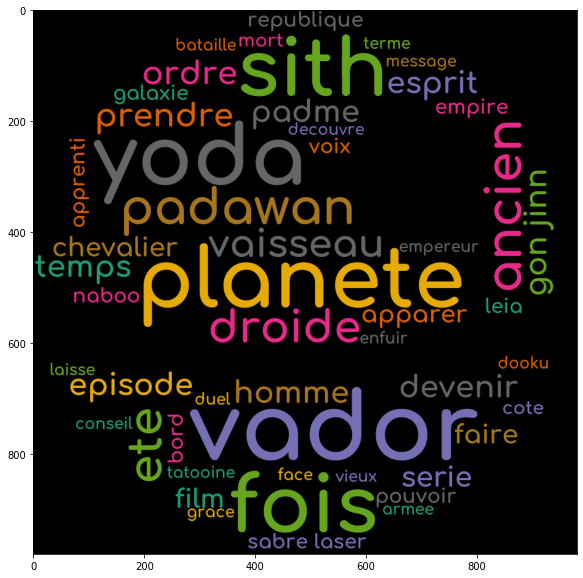

In [ ]:
wd = wordcloud.WordCloud(min_font_size=20,
                         max_words=100, 
                         background_color="black",
                         colormap='Dark2',
                         mask = mask2,
                         font_path =font_path, 
                         stopwords=STOP_WORDS)
# Generate word cloud 
cloud = wd.generate(new)


plt.figure(figsize = (10,10))
# Show plot
plt.imshow(cloud)
plt.show()

* We will now start building a tf-idf matrix. Let's first create a DataFrame containing our lemmatized corpus without the updated stop words.

In [ ]:
STOP_WORDS

In [ ]:
df = df.iloc[1:,:] #1st row empty

In [ ]:
df.sample()

,clean_documents,clean_token
19,obi wan dissimule dans le vaisseau de padme re...,obi wan dissimule vaisseau padme retrouve anak...


In [ ]:
#custom function to delete stop_words and custom stop_words

def clean_stop_words (my_string) :
  my_string = my_string.split(' ')
   
  my_new_string = list()
  for word in my_string:
    if word is not None:
      if word not in STOP_WORDS :
       my_new_string.append(word)
  my_new_string = ' '.join(my_new_string)
  return my_new_string



In [ ]:
df['clean_documents_without_stop_words'] = df.apply(lambda x : clean_stop_words(x['clean_documents']), axis=1)

In [ ]:
df.sample(3)

,clean_documents,clean_token,clean_documents_without_stop_words
41,quoique souvent impatient face au senat et ses...,impatient face senat debat politicien obi wan ...,impatient face senat debats politiciens croit ...
49,la municipalite de lubicz non loin de torun en...,municipalite lubicz loin torun pologne decid ...,municipalite lubicz loin torun pologne decide ...
15,apres que le maitre jedi even piell est empris...,maitre jedi even piell emprisonne planete pris...,even piell emprisonne planete prison lola sayu...


* Let's create now a TF-IDF matrix using `sklearn`

In [ ]:
document = ' '.join(df.clean_documents_without_stop_words.tolist())

* Let's create now a TF-IDF matrix using `sklearn`

In [ ]:
df2 = pd.DataFrame(data = [document], columns=['all_tokens'])
df2

,all_tokens
0,ben personnage fiction univers serie cinematog...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words=STOP_WORDS)

X = vectorizer.fit_transform(df2.all_tokens)

feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
results = pd.DataFrame(denselist, columns=feature_names).T
results = results.rename(columns={0 : 'score'})
results.sort_values(by='score', ascending=False).head(20)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['quelqu'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,score
clones,0.181742
yoda,0.168760
padawan,0.155778
vador,0.155778
planete,0.142797
...,...
fort,0.012982
fou,0.012982
foucault,0.012982
foudroyant,0.012982


* Visualize most important words using `seaborn`, `matplotlib` or `plotly`

> Help: You can create a dataframe, transpose it and then easily create a visualization

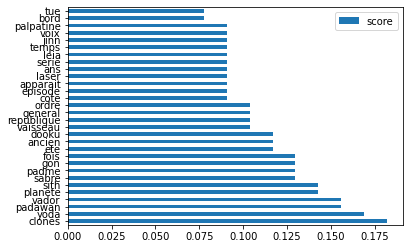

In [ ]:
results.sort_values(by='score', ascending=False).head(30).plot(kind = 'barh');